# Meta-analysis with random effects model (normal-normal)

In [10]:
# Data from stroke meta-analysis
eff_size = np.array([0.334647179, -0.2997250305, -0.2428621299, -1.622743498, 
                     -0.2423718801, -1.06431894, 0.2937822071, -1.499113213, -0.8203,
                     -0.5974, -0.1137870633, 0.1822088181, -0.0935022265, -0.775408451,
                     -0.1736013005, -0.3385696316, -1.024715091, -0.08220616002, 
                     0.1098119513])
eff_size_se = np.array([0.450357143, 0.449693878, 0.587653061, 0.672704082, 0.461173469, 
                        0.477806122, 0.588571429, 0.660663265, 0.54372449, 1.1338, 0.507908163, 
                        0.354285714, 0.39244898, 0.445714286, 0.37867347, 0.3980102, 0.40923469, 
                        0.527244898, 0.816938776])
n_studies = len(eff_size)

In [21]:
# with pm.Model(coords={"studies": studies}) as model:
with pm.Model() as model_2:
    
    # Hyper-priors
    mu_theta = pm.Normal("mu_theta", mu=0, sigma=1)
    tau_theta = pm.Exponential("tau_theta", lam=1)

    # Priors
    theta = pm.Normal("theta", mu=mu_theta, sigma=tau_theta, shape=n_studies)

    # Likelihood
    y = pm.Normal('y', mu=theta, tau=1 / (eff_size_se**2), observed=eff_size)  # y_obs is empirical (mean) effect size of each study
    
    # Sample from the posterior
    idata_2 = pm.sample(n_draws=2000, target_accept=0.92)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_theta, tau_theta, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


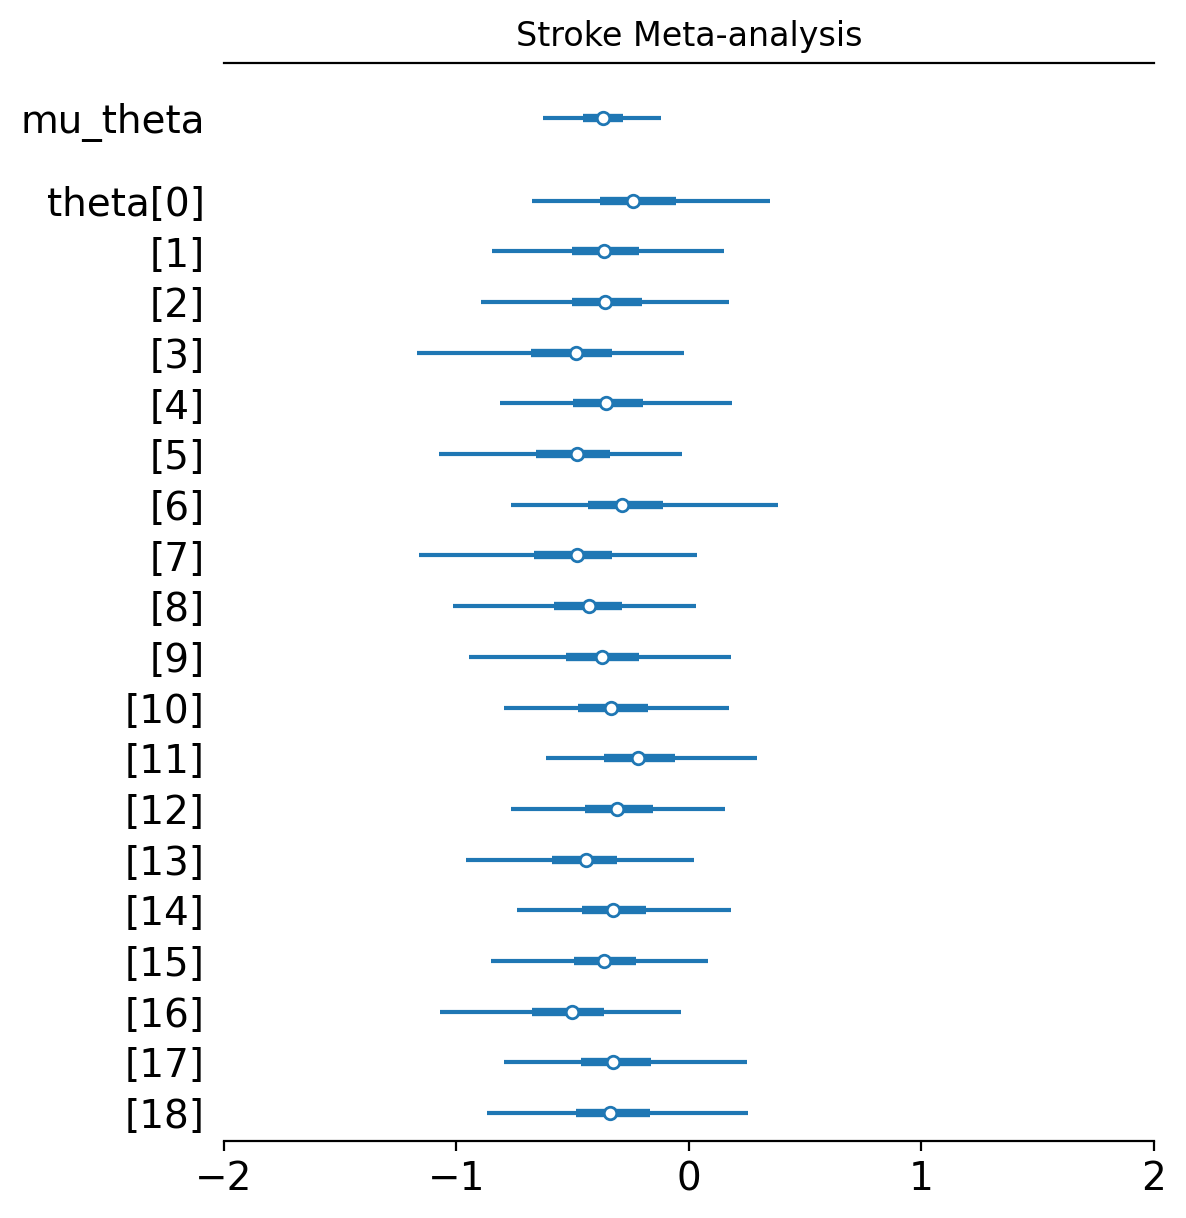

In [22]:
_, ax = plt.subplots(figsize=(6, 7))
az.plot_forest(idata_2, 
               var_names=["mu_theta", "theta"], 
               kind="forestplot",
               combined=True,
               ax=ax)
ax.set_xlim([-2, 2])
ax.set_title("Stroke Meta-analysis");

In [23]:
az.summary(idata_2, var_names=["mu_theta", "theta"])

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_theta,-0.369,0.129,-0.630,-0.119,0.004,0.003,831.0,757.0,1.00
theta[0],-0.204,0.260,-0.674,0.350,0.013,0.009,470.0,1654.0,1.01
theta[1],-0.360,0.243,-0.849,0.150,0.005,0.005,1933.0,1876.0,1.01
theta[2],-0.351,0.262,-0.896,0.173,0.005,0.004,2289.0,2202.0,1.01
theta[3],-0.527,0.297,-1.169,-0.019,0.010,0.007,873.0,1268.0,1.02
theta[4],-0.344,0.249,-0.813,0.186,0.005,0.004,2364.0,1819.0,1.01
theta[5],-0.516,0.269,-1.074,-0.031,0.009,0.006,966.0,1293.0,1.01
theta[6],-0.260,0.279,-0.765,0.385,0.008,0.005,1277.0,1964.0,1.01
theta[7],-0.523,0.301,-1.161,0.035,0.010,0.007,1081.0,1582.0,1.02
theta[8],-0.446,0.258,-1.013,0.030,0.007,0.005,1334.0,1291.0,1.02


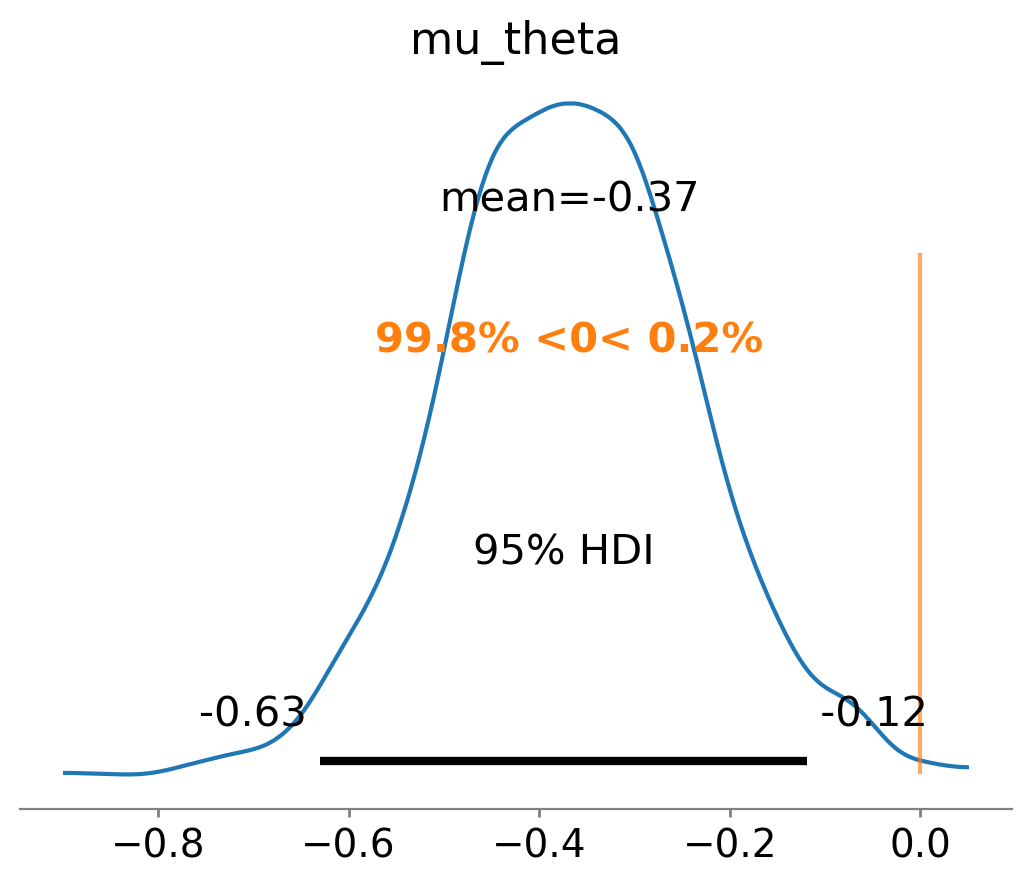

In [25]:
az.plot_posterior(idata_2, var_names=["mu_theta"], ref_val=0);